In [352]:
# how to just get submissions

# /reddit/search/submission
import pandas as pd
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

import requests
from datetime import datetime
import time
import random

# custom helper functions for this project (located in nlp_helper_functions.py)
from helper_functions.nlp_helper_functions import get_df,word_counter
from helper_functions.nlp_helper_functions import pre_process,Ucase_counter,Lcase_counter,punctuation_cntr

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re



from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import nltk


In [297]:
df_main.head()

,selftext,title,target,punctuation_count,word_count
0,There are a lot of chauvinists in the U.S. who...,Is Kamala Harris more at risk of assassination...,0,60,206
1,Let me explain. The name of your movement shou...,"A push labeled ""Let mothers hold their babies""",0,120,454
2,I have read about some horrific pit bull attac...,Why don't we see politicians supporting pit bu...,0,77,267
3,Some international observers have argued that...,What threat does EU expansion pose towards Rus...,0,82,412
4,Every definition of the term implies cheating....,Why is gerrymandering legal?,0,24,98


---

EDA with political data

Thhere were quite a bit of duplicates remaining the majority of them come from having NaN values or deleted posts from the moderators. However to maintain balanced classes for the future classification models to train on the shape of the smallest. In this case df_con will be used for the baseline to have an equal amount of observations, once the duplicated rows are dropped. 

In [350]:
# importing cleaned data per subreddit to explore individually
df_con = pd.read_csv('../data/clean_df_con.csv')
df_pol = pd.read_csv('../data/clean_df_pol.csv')

# importing combing cleaned csv for count vectorizing below
df_main = pd.read_csv('../data/cleaned_main.csv')

# Exploring basic Characteristics of the Subreddits
--- 
Word Count between Subreddits

In [299]:
df_pol['word_count']=df_pol['selftext'].apply(word_counter)
df_pol['word_count'].head()

0    206
1    454
2    267
3    412
4     98
Name: word_count, dtype: int64

Looking at shortest and longest selftext posts:

In [300]:
# political data with large word counts
df_pol_upper = df_pol['word_count'].std()*3
df_pol[df_pol['word_count']>=df_pol_upper]['selftext'].head()

49     (I'm in the USA, just to set up the context fo...
102    If you look at the operations of the CIA and o...
161    I want to preface this with a bit of backstory...
169    The TLDR question is in the title.\n\nThe long...
274    As I understand it, those states had those spi...
Name: selftext, dtype: object

In [301]:
# political data with small word counts
df_pol_lower = df_pol['word_count'].std()*3
df_pol[df_pol['word_count']<=df_pol_lower]['selftext'].head()

0    There are a lot of chauvinists in the U.S. who...
1    Let me explain. The name of your movement shou...
2    I have read about some horrific pit bull attac...
3     Some international observers have argued that...
4    Every definition of the term implies cheating....
Name: selftext, dtype: object

In [302]:
# Counting words in consipiracy subredit and looking at data with small word counts
df_con['word_count']=df_con['selftext'].apply(word_counter)
df_con['word_count'].head()
df_con_lower = df_con['word_count'].std()*3
df_pol[df_pol['word_count']<=df_con_lower]['selftext'].head()

0    There are a lot of chauvinists in the U.S. who...
1    Let me explain. The name of your movement shou...
2    I have read about some horrific pit bull attac...
3     Some international observers have argued that...
4    Every definition of the term implies cheating....
Name: selftext, dtype: object

In [303]:
# looking at data with small word counts
df_con_upper = df_con['word_count'].std()*3
df_con[df_con['word_count']>=df_con_upper]['selftext'].head()

48     If you haven't yet been acquainted with Aleksa...
105    So, one thing we speculate is that COVID-19 ha...
112    It is flattering to the Ego to believe we are ...
121    The Military Industrial Complex has made billi...
180    *PSA this is not a bash against Christians or ...
Name: selftext, dtype: object

---
# Comparing AskPolitics and Conspiracy Subreddit Characterisitcs



Word length selftext 

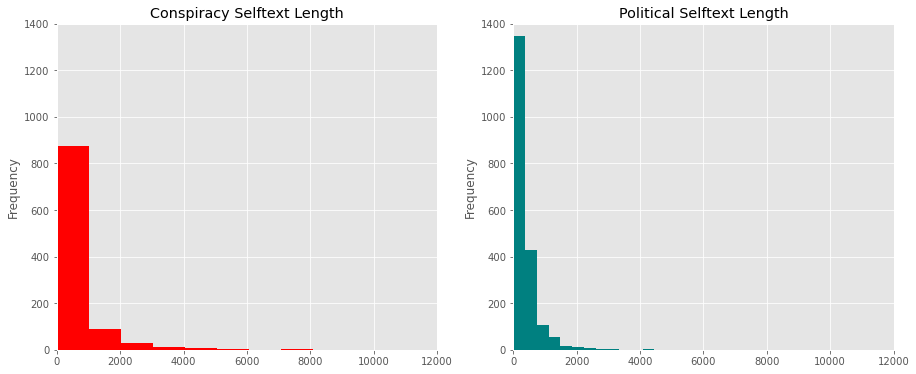

In [328]:
# want to compare status length and word count
# (this was really simpler code than others so will use this from now on)
# https://stackoverflow.com/questions/45069828/how-to-plot-2-histograms-side-by-side
fig= plt.style.use('ggplot')

fig, axes = plt.subplots(1,2,figsize=(15,6))
df_con['word_count'].plot.hist(bins=20,ax=axes[0],color='red');
axes[0].set_title('Conspiracy Selftext Length')
axes[0].set(xlim=(0, 12000), ylim=(0, 1400));

df_pol['word_count'].plot.hist(bins=20,ax=axes[1],color='teal');
axes[1].set_title('Political Selftext Length');
axes[1].set(xlim=(0, 12000), ylim=(0, 1400));

From this we can tell that generally speaking there was a more frequent amount of subreddits with shorter selftext lengths in the AskPolitics subreddit as opposed to the conspiracy subreddit postings. 
********





Word length selftext and title

In [305]:
# counting length of the titles
df_pol['title_word_count']=df_pol['title'].apply(word_counter)
print(df_pol['title_word_count'].head(2))
df_con['title_word_count']=df_con['title'].apply(word_counter)
df_con['title_word_count'].head(2)

0    51
1    37
Name: title_word_count, dtype: int64


0    51
1    34
Name: title_word_count, dtype: int64

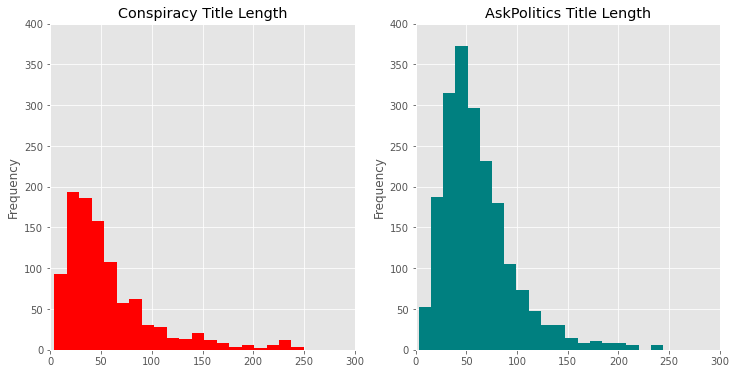

In [306]:
# plotting the distribution of title lenght per subreddit
fig= plt.style.use('ggplot')

fig, axes = plt.subplots(1,2,figsize=(12,6))
df_con['title_word_count'].plot.hist(bins=20,ax=axes[0],color='red');
axes[0].set_title('Conspiracy Title Length')
#axes[0].('conspiracy title length')
axes[0].set(xlim=(0, 300), ylim=(0, 400));

df_pol['title_word_count'].plot.hist(bins=20,ax=axes[1],color='teal');
axes[1].set_title('AskPolitics Title Length');
axes[1].set(xlim=(0, 300), ylim=(0, 400));


From the distribution plot we can see that there are more users creating shorter posts in the AskPolitics page than in the consipiracy posts. Will look at the starting statements of some of the top posts in each subreddit. 

In [340]:
# conspiracy data with long titles
df_con_upper = df_con['title_word_count'].std()*3
df_con[df_con['title_word_count']>=df_con_upper]['title'].sort_values(ascending=False)[:4]

479    “There are Nazis in Ukraine!” Dude there are N...
857    “I have zero doubt in my mind that currently c...
214    ‘Climate change’ is real, but it’s being sold ...
466    Why is Israeli lobby calling people anti-semit...
Name: title, dtype: object

In [341]:
# political data with long titles
df_pol_upper = df_pol['title_word_count'].std()*3
df_pol[df_pol['title_word_count']>=df_pol_upper]['title'].sort_values(ascending=False)[:4]

1702    “The entire election, frankly, in all the swin...
1652    ‘Personal Responsibility’ in states like South...
1241    why let immirgants into any places ? immigrant...
647     why do the nations need an army if we have alr...
Name: title, dtype: object

These are obviously topics that are of interest in current times but we can at least see that this is a fairly active discussion group from even just the titles.

----

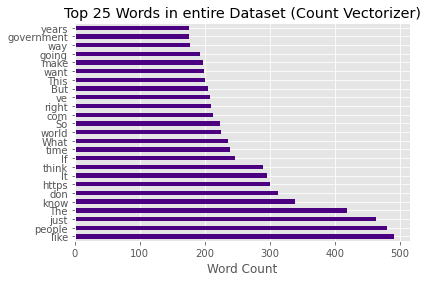

In [310]:
# Vectoring to see top 25 words for whole dataset
cvec = CountVectorizer(stop_words='english', # eliminating the basic stop words
                        binary=True, 
                        lowercase =False, # we want to pay attention to case sensitivity later
                        max_df= 0.75, # this is a form of creating a customized stop words list 
                        max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
main_vectorized = cvec.fit_transform(df_main['selftext'])

# Convert X_train and X_test into a DataFrame.
#df_vectorized = pd.DataFrame(df_main_vectorized.todense(),columns=cvec.get_feature_names())


df_vectorized = pd.DataFrame(main_vectorized.todense(),columns=cvec.get_feature_names())


ax = df_vectorized.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',color='indigo');
ax.set_title('Top 25 Words in entire Dataset (Count Vectorizer)')
ax.set_xlabel('Word Count');


These words are generally to be expected since a majority of these are filler word and based on the subreddits chosen the word 'government' should be expected in both subreddits. However below the top 25 words will be explored per subreddit.

In [351]:
# isolating only one subreddit to vectorize at a time
df_con_self= df_main[df_main['target']==1]['selftext']

# Vectoring to see top 25 words per subreddit
cvec = CountVectorizer(stop_words='english', # eliminating the basic stop words
                        binary=True, 
                        lowercase =False, # we want to pay attention to case sensitivity later
                        max_df= 0.75, # this is a form of creating a customized stop words list 
                        max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on conspiracy subreddit selftext
main_vectorized = cvec.fit_transform(df_con_self)

# Converting into a DataFrame.
df_vectorized_con = pd.DataFrame(main_vectorized.todense(),columns=cvec.get_feature_names())

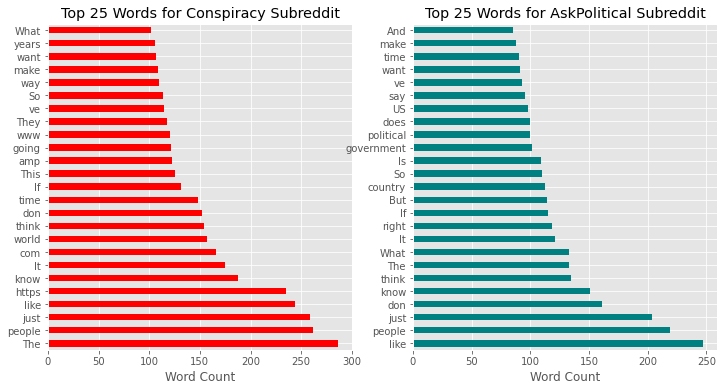

In [312]:
# isolating only one subreddit 
df_pol_self= df_main[df_main['target']==0]['selftext']

# Vectoring to see top 25 words per subreddit
cvec = CountVectorizer(stop_words='english', # eliminating the basic stop words
                        binary=True, 
                        lowercase =False, # we want to pay attention to case sensitivity later
                        max_df= 0.75, # this is a form of creating a customized stop words list 
                        max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on askpolitics subreddit selftext
main_vectorized = cvec.fit_transform(df_pol_self)

# Converting into a DataFrame.df_vectorized_pol = pd.DataFrame(main_vectorized.todense(),columns=cvec.get_feature_names())

########## Looking at top words in both subreddits 
fig, axes = plt.subplots(1,2,figsize=(12,6))
df_vectorized_con.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',color='red',ax=axes[0]);
axes[0].set_title('Top 25 Words for Conspiracy Subreddit')
axes[0].set_xlabel('Word Count');

df_vectorized_pol.sum().sort_values(ascending = False).head(25).plot(kind = 'barh',color='teal',ax=axes[1]);
axes[1].set_title('Top 25 Words for AskPolitical Subreddit')
axes[1].set_xlabel('Word Count');

From these word distributions it is noteable that there are a decent amount of filler words among both of these subreddits. Certain words were likely split because of the punctuation processing such as 'don' was most likely 'don't' before the processing. However a very important word for both is 'people' which is not surprising but noted.

There appears to be a large amount of links shared in the conspiracy text as well, this is identified by having the pieces of a url included in the top 25 such as 'https', 'www', and 'com'. A potential reason for this is that this subreddit was identified to be a large contritbutor of fake news where it was identified that this subreddit specifically hosted more fake news related urls among many news platforms (reference in readme.md under backgroud information).

---
Exploring Punctuation Character Counts Amongst Subreddits

In [313]:
# 
df_main['selftext'].head(2)

0    There are a lot of chauvinists in the U.S. who...
1    Let me explain. The name of your movement shou...
Name: selftext, dtype: object

In [356]:
# counting punction for whole dataset
df_main['punctuation_count']=df_main['selftext'].apply(punctuation_cntr)
df_main['punctuation_count'].head(2)

0     57
1    106
Name: punctuation_count, dtype: int64

In [315]:
# filtering by subreddit to then plot distributions 
punctuation_pol = df_main[df_main['target']==1]['punctuation_count']
punctuation_con = df_main[df_main['target']==0]['punctuation_count']

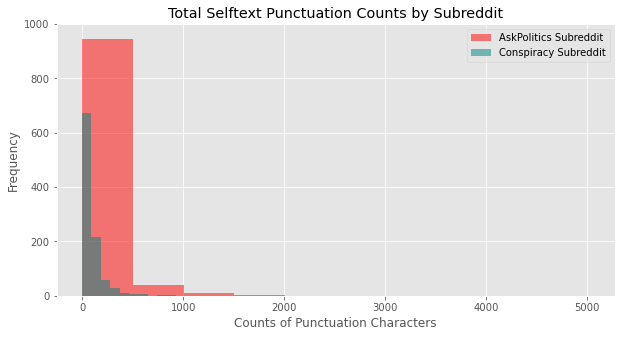

In [316]:
# plotting them on top of one another
plt.figure(figsize = (10,5))
x = punctuation_pol
y = punctuation_con
plt.hist(x, alpha=0.5, label='AskPolitics Subreddit',color='red')
plt.xlabel('Counts of Punctuation Characters')
plt.ylabel('Frequency')
plt.ylim(0,1000)
plt.title('Total Selftext Punctuation Counts by Subreddit')
plt.hist(y, alpha=0.5, label='Conspiracy Subreddit',color='teal')
plt.legend(loc='upper right')
plt.show()

---
# Sentiment Analysis
Note that this was performed in an attempt to gather features that could potentially be of use when attempting to differentiate one subreddit from one another. 

In [317]:
# storing the column 'selftex' as a list to pass into a count vectorizer below
corpus = list(df_main['selftext'])
corpus[:1]

["There are a lot of chauvinists in the U.S. who don't want to see a female president so I feel like Joe Biden is the least likely to be targeted president we've had. I would fear more for Harris's safety than Biden's since people wouldn't want her to be next in line."]

In [318]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

# Looking at the first subreddit sensitivity analysis scores 
sia.polarity_scores(corpus[1])

{'neg': 0.067, 'neu': 0.804, 'pos': 0.129, 'compound': 0.7897}

In [319]:
# creating a dataframe that contains text and the polarity scores for each selftext post
sentiment = []    

for text in corpus:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    sentiment.append(scores)

main_sent_self = pd.DataFrame(sentiment)
main_sent_self.head()

,neg,neu,pos,compound,text
0,0.104,0.789,0.107,0.2955,There are a lot of chauvinists in the U.S. who...
1,0.067,0.804,0.129,0.7897,Let me explain. The name of your movement shou...
2,0.263,0.737,0.000,-0.9559,I have read about some horrific pit bull attac...
3,0.109,0.737,0.154,0.4606,Some international observers have argued that...
4,0.146,0.854,0.000,-0.5574,Every definition of the term implies cheating....


In [320]:
# merging two dataframes to filter and look at scores afterwards
print('sentiment analysis shape: ',main_sent_self.shape)
print('df_main target shape: ',df_main['target'].shape)

sentiment analysis shape:  (1998, 5)
df_main target shape:  (1998,)


In [321]:
# sentiment analysis concatenate with orginal main dataframe 
sentiment_whole = pd.concat([main_sent_self,df_main], axis=1, join='outer')

# high positive sentiment scores for both subreddits
sentiment_whole[['target','neg','neu','pos']].sort_values(by='pos',ascending=False).head()

,target,neg,neu,pos
518,0.0,0.0,0.000,1.000
1064,1.0,0.0,0.275,0.725
335,0.0,0.0,0.286,0.714
1308,1.0,0.0,0.303,0.697
1850,1.0,0.0,0.303,0.697


In [322]:
# lower positivity rate in conspiracy subreddit
sentiment_whole[sentiment_whole['target']==1].sort_values(by='pos',ascending=True).head()


,neg,neu,pos,compound,text,selftext,title,target,punctuation_count,word_count
1693,0.000,1.000,0.0,0.0000,https://youtu.be/2OqyocO4u74,As sad as all the covid deaths &amp; infection...,Any conspiracy on why covid was milked out of ...,1.0,101.0,356.0
1642,0.164,0.836,0.0,-0.6705,Imagine the angry folks who can’t get their fi...,I'd like to talk about some conspiracies on he...,what do you think the elites goal is beyond wo...,1.0,163.0,593.0
1645,0.233,0.767,0.0,-0.8860,* Democide is the murder of any person or peop...,"I have a theory, the title beat describes it....","Religion, vmat2, demons, gene therapy, Cern, d...",1.0,134.0,556.0
1656,0.128,0.872,0.0,-0.8482,Take a flashlight n peak outside. In Central M...,Rumors that the part of Ukraine next to Hungar...,What if Poland and Hungary make deal with Russ...,1.0,86.0,385.0
1215,0.000,1.000,0.0,0.0000,I think we are about to be paying waaaaay more...,it's when there was a need for the establishme...,the american civil war was when the last mudfl...,1.0,81.0,320.0


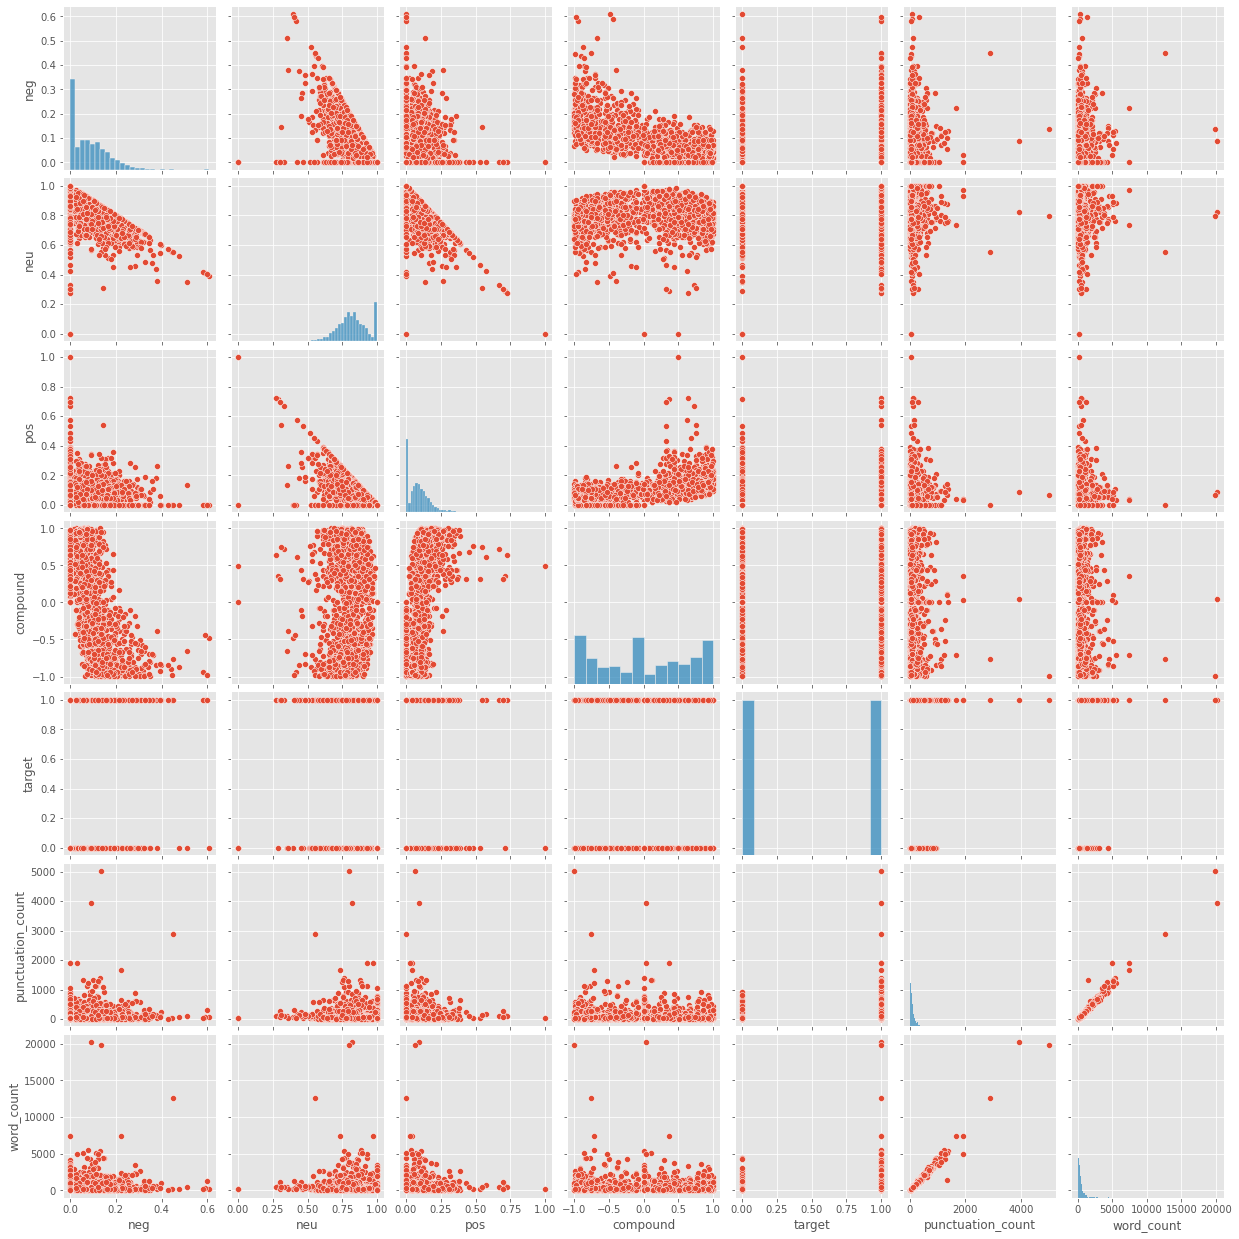

In [324]:
# concatenating sentiment with word count to pair plot as well
sentiment_whole = pd.concat([main_sent_self,df_main], axis=1, join='outer')

# exporting sentiment_whole for future modeling 
sentiment_whole.to_csv('../data/sentiment_whole.csv',index=False)

# looking at the distributions among the variables in sentiment_whole
sns.pairplot(sentiment_whole);

Unfortunately we did not find any strong relationships between the target (subreddit class) and the features included howeveer a heatmap of correlations will be performed to guage actual strength of any potential relationship. There are strong relationship between word count and punctuation count but there are dependent on one another so they are demonstrating some multicolinearity.

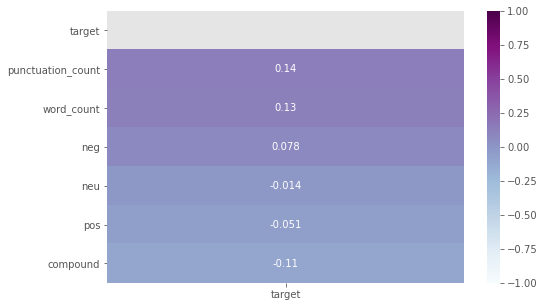

In [325]:
# plotting heatmap of feature correlations against the target variable 
corr = sentiment_whole.corr()[['target']].sort_values('target',ascending=False)
mask1 = np.triu(np.ones_like(corr, dtype=bool))

fig= plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr,mask=mask1,
 vmax=1, vmin=-1, annot=True,cmap='BuPu');

Clearly we can see that there are no strong features that could potentially hold a strong relationship with the target column, so we will be expecting to gain more predicive power from the vectorized words themselves in the following notebook. 

Please refer to the Log_Reg_NLPmodel.ipynb for the first model iteration notebook.

--- 
Aside: Generating a word cloud before for presentation purposes 

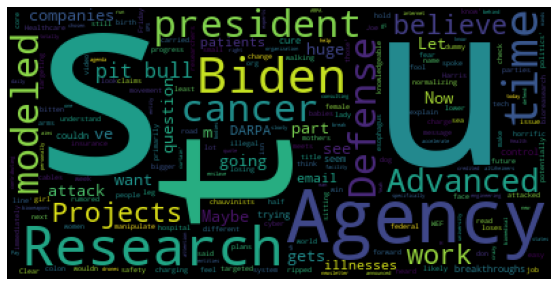

In [355]:
# creating a word cloud (code reference: https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f)
text = df_main['selftext'].values 

wordcloud = WordCloud().generate(str(text))
plt.figure(figsize = (15,5))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()